# Filtering and Auto-Correlation Tutorial with Temperature Data
In this scipt we will perform basic filtering operations using pandas (low pass and high pass filtering) and also examine the auto-correlation structure of temperature data (taken from the [Historical Hourly Weather Dataset](https://www.kaggle.com/selfishgene/historical-hourly-weather-data)) also using pandas.

The main goal of the script is to give some intuition about what low pass and high pass filtering operations are, and understand what is the auto-correlation function. We use hourly sampled temperature data since it contains periodic structrue both on a daily basis and on a yearly basis.

In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import autocorrelation_plot, lag_plot
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Load Data and Show available Cities in the dataset

In [2]:
#%% load data that will be used in the script
cityTable     = pd.read_csv('../input/city_attributes.csv')
temperatureDF = pd.read_csv('../input/temperature.csv', index_col=0)
temperatureDF.index = pd.to_datetime(temperatureDF.index)

cityTable

,City,Country,Latitude,Longitude
0,Vancouver,Canada,49.249660,-123.119339
1,Portland,United States,45.523449,-122.676208
2,San Francisco,United States,37.774929,-122.419418
3,Seattle,United States,47.606209,-122.332069
4,Los Angeles,United States,34.052231,-118.243683
5,San Diego,United States,32.715328,-117.157257
6,Las Vegas,United States,36.174969,-115.137222
7,Phoenix,United States,33.448380,-112.074043
8,Albuquerque,United States,35.084492,-106.651138
9,Denver,United States,39.739151,-104.984703


We see that the cities have latitude and longitude information, and are ordered from west to east (according to longitude coordinate).

# Show Temperature as function of time for several selected Cities

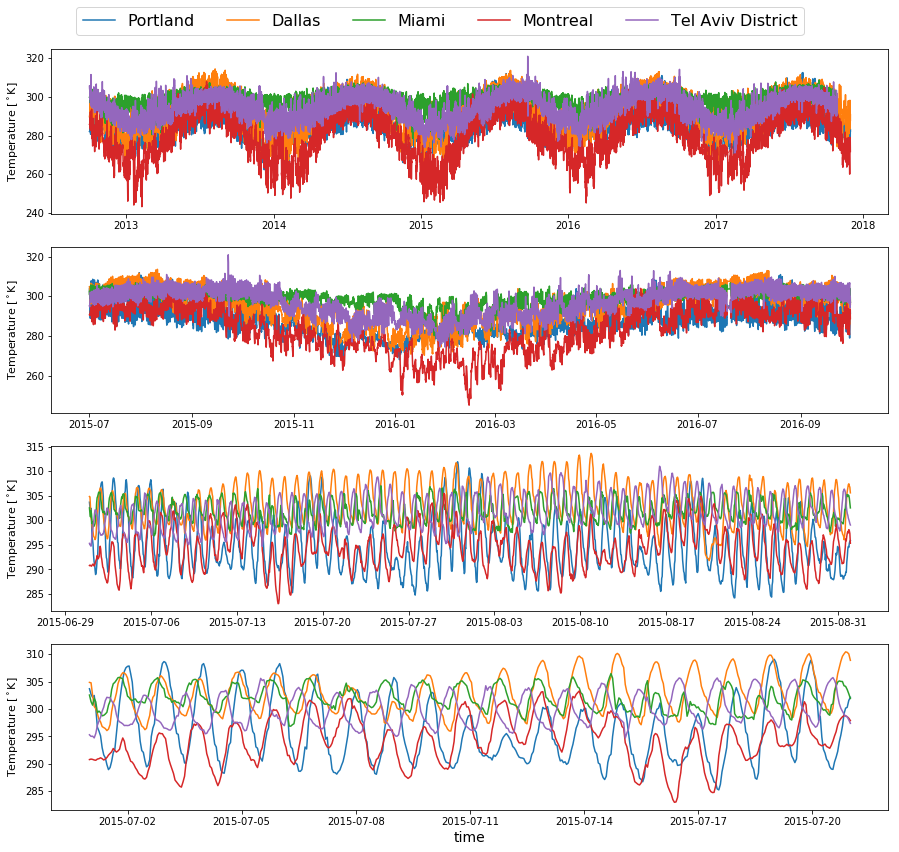

In [3]:
#%% show several temperature plots to get a feel for the dataset
#citiesToShow = ['San Francisco','Las Vegas','Chicago','Toronto','Houston','Jerusalem']
citiesToShow  = ['Portland','Dallas','Miami','Montreal','Tel Aviv District']

t0 = temperatureDF.index
t1 = pd.date_range(pd.to_datetime('1/7/2015',dayfirst=True),pd.to_datetime('1/10/2016',dayfirst=True),freq='H')
t2 = pd.date_range(pd.to_datetime('1/7/2015',dayfirst=True),pd.to_datetime('1/9/2015' ,dayfirst=True),freq='H')
t3 = pd.date_range(pd.to_datetime('1/7/2015',dayfirst=True),pd.to_datetime('21/7/2015',dayfirst=True),freq='H')
t = [t0, t1, t2, t3]

fig, ax = plt.subplots(nrows=4,ncols=1,figsize=(15,14))
for i, t in enumerate(t):
    for k in range(len(citiesToShow)):
        ax[i].plot(t,temperatureDF.loc[t,citiesToShow[k]])

ax[0].legend(citiesToShow, fontsize=16,
              loc='upper left',bbox_to_anchor=(0.02,1.3), ncol=len(citiesToShow))
for i in range(len(ax)): ax[i].set_ylabel('Temperature [$^\circ$K]', fontsize=11)
ax[3].set_xlabel('time', fontsize=14);


We clearly see yearly periodicity (top plot) as well as daily peridicity (bottom two plots) in all cities. We can also see that it's quite warm in Miami and Dallas, quite cool in Montreal and the amplitude between day and night in Portland is very large.

# Show the Auto-Correlation function of Los Angeles Temperature Signal

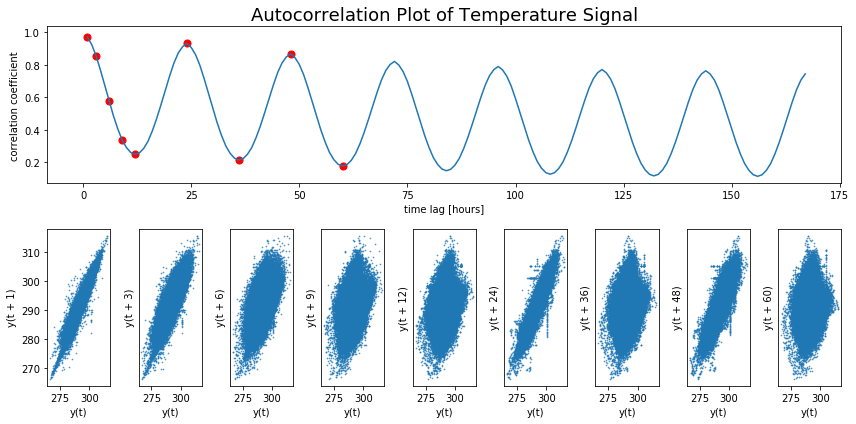

In [4]:
#%% show autocorr and lag plots

cityToShow = 'Los Angeles'
selectedLagPoints = [1,3,6,9,12,24,36,48,60]
maxLagDays = 7

originalSignal = temperatureDF[cityToShow]

# set grid spec of the subplots
plt.figure(figsize=(12,6))
gs = gridspec.GridSpec(2, len(selectedLagPoints))
axTopRow = plt.subplot(gs[0, :])
axBottomRow = []
for i in range(len(selectedLagPoints)):
    axBottomRow.append(plt.subplot(gs[1, i]))

# plot autocorr
allTimeLags = np.arange(1,maxLagDays*24)
autoCorr = [originalSignal.autocorr(lag=dt) for dt in allTimeLags]
axTopRow.plot(allTimeLags,autoCorr); 
axTopRow.set_title('Autocorrelation Plot of Temperature Signal', fontsize=18);
axTopRow.set_xlabel('time lag [hours]'); axTopRow.set_ylabel('correlation coefficient')
selectedAutoCorr = [originalSignal.autocorr(lag=dt) for dt in selectedLagPoints]
axTopRow.scatter(x=selectedLagPoints, y=selectedAutoCorr, s=50, c='r')

# plot scatter plot of selected points
for i in range(len(selectedLagPoints)):
    lag_plot(originalSignal, lag=selectedLagPoints[i], s=0.5, alpha=0.7, ax=axBottomRow[i])    
    if i >= 1:
        axBottomRow[i].set_yticks([],[])
plt.tight_layout()

The top row shows the auto-correlation plot.  
The bottom scatter plots correspond to the red points marked on the auto-correlation plot. 

The leftmost plot shows the Temperature at time t vs Temperature at time t + 1 hour scatter plot. We know that weather doesn't change that much in one hour and therefore we see extreemly high correlation between the temeratures there.  
This correlation gradually decreases up to 12 hour difference, that corresponds to the switch from day to night, and then contiues to oscillate with a slow decreasing trend as the days go by. 

# Show Auto-Correlation with various zoom ins (temporal scales)

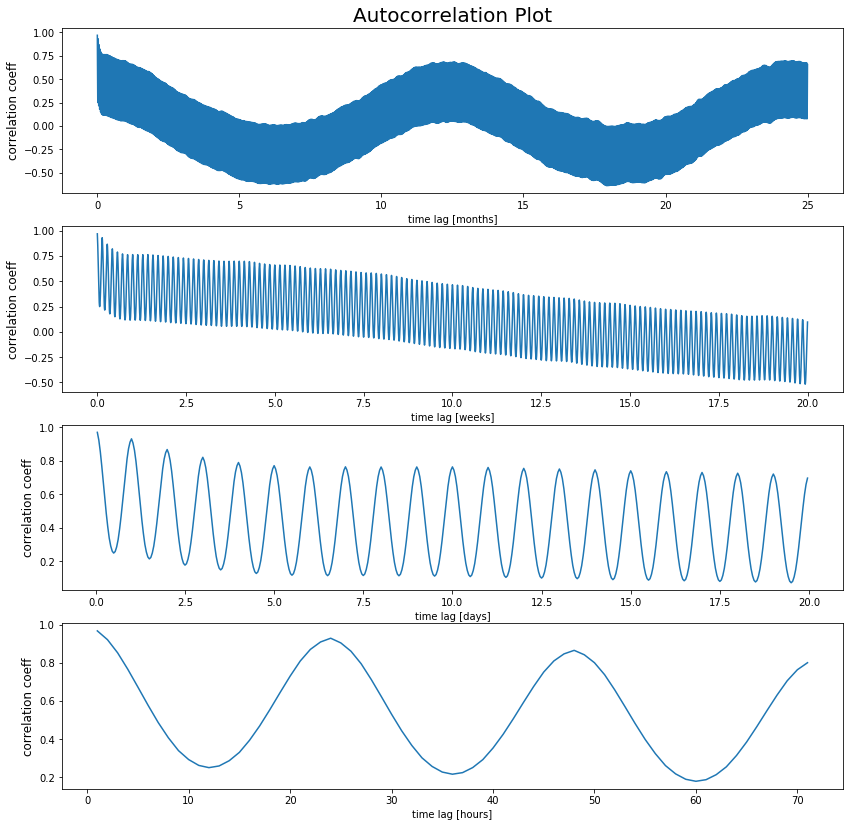

In [5]:
#%% zoom in and out on the autocorr plot
fig, ax = plt.subplots(nrows=4,ncols=1, figsize=(14,14))

timeLags = np.arange(1,25*24*30)
autoCorr = [originalSignal.autocorr(lag=dt) for dt in timeLags]
ax[0].plot(1.0/(24*30)*timeLags, autoCorr); ax[0].set_title('Autocorrelation Plot', fontsize=20);
ax[0].set_xlabel('time lag [months]'); ax[0].set_ylabel('correlation coeff', fontsize=12);

timeLags = np.arange(1,20*24*7)
autoCorr = [originalSignal.autocorr(lag=dt) for dt in timeLags]
ax[1].plot(1.0/(24*7)*timeLags, autoCorr);
ax[1].set_xlabel('time lag [weeks]'); ax[1].set_ylabel('correlation coeff', fontsize=12);

timeLags = np.arange(1,20*24)
autoCorr = [originalSignal.autocorr(lag=dt) for dt in timeLags]
ax[2].plot(1.0/24*timeLags, autoCorr);
ax[2].set_xlabel('time lag [days]'); ax[2].set_ylabel('correlation coeff', fontsize=12);

timeLags = np.arange(1,3*24)
autoCorr = [originalSignal.autocorr(lag=dt) for dt in timeLags]
ax[3].plot(timeLags, autoCorr);
ax[3].set_xlabel('time lag [hours]'); ax[3].set_ylabel('correlation coeff', fontsize=12);

### We clearly see the two periods here:
* The yearly period on the top plot (12 month period)
* The daily period on the two bottom plots (24 hour period)

When we looked at the data we also saw these two periods, but these autocorr plots are much smoother as they represent aggregate data across all time points of the signal. 

# Apply moving average and show the Low Pass Filtered Signal
The name low pass is because the resulting singal contains only low frequency changes. Applying the moving average operation (or different phrasing of the same this: filtering/convolving with a rectangular filter), is eqivalent to filtering out the high frequency changes and keeping only low frequency changes in the original signal. Hence the name "low pass".

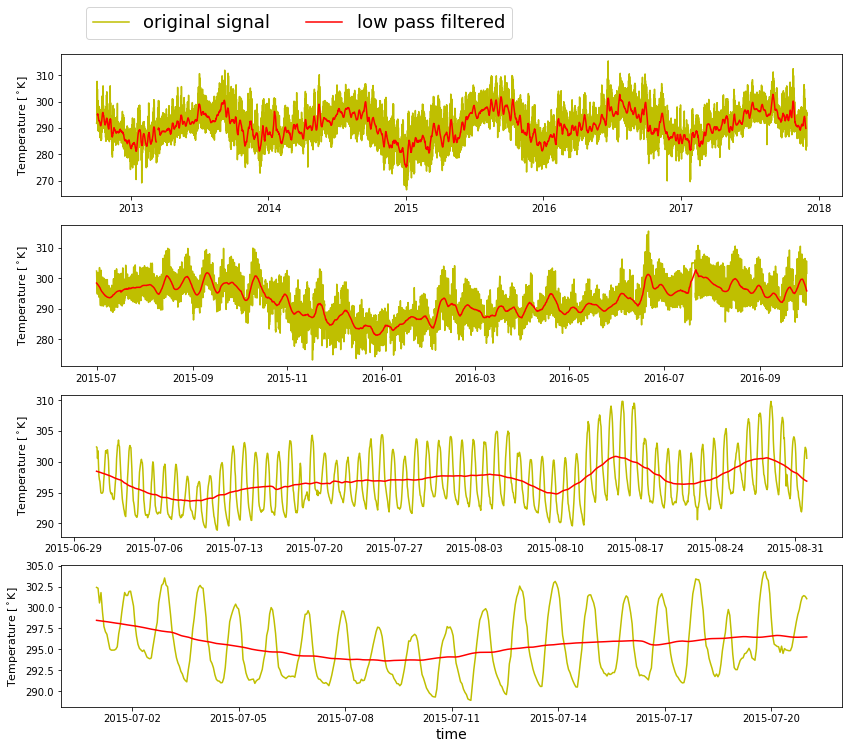

In [6]:
#%% apply rolling mean and plot the signal (low pass filter)
windowSize = 5*24

lowPassFilteredSignal = originalSignal.rolling(windowSize, center=True).mean()

t0 = temperatureDF.index
t1 = pd.date_range(pd.to_datetime('1/7/2015',dayfirst=True),
                   pd.to_datetime('1/10/2016',dayfirst=True),freq='H')
t2 = pd.date_range(pd.to_datetime('1/7/2015',dayfirst=True),
                   pd.to_datetime('1/9/2015' ,dayfirst=True),freq='H')
t3 = pd.date_range(pd.to_datetime('1/7/2015',dayfirst=True),
                   pd.to_datetime('21/7/2015',dayfirst=True),freq='H')

fig, ax = plt.subplots(nrows=4,ncols=1,figsize=(14,12))
ax[0].plot(t0,originalSignal,c='y')
ax[0].plot(t0,lowPassFilteredSignal,c='r')

ax[1].plot(t1,originalSignal[t1],c='y')
ax[1].plot(t1,lowPassFilteredSignal[t1],c='r')

ax[2].plot(t2,originalSignal[t2],c='y')
ax[2].plot(t2,lowPassFilteredSignal[t2],c='r')

ax[3].plot(t3,originalSignal[t3],c='y')
ax[3].plot(t3,lowPassFilteredSignal[t3],c='r')

ax[0].legend(['original signal','low pass filtered'], fontsize=18,
              loc='upper left',bbox_to_anchor=(0.02,1.4), ncol=len(citiesToShow))
for i in range(len(ax)): ax[i].set_ylabel('Temperature [$^\circ$K]', fontsize=11)
ax[3].set_xlabel('time', fontsize=14);


# Subtract the Low-Pass-Filtered Signal from the Original Signal and show the resulting High-Pass-Filtered Signal
The deviation from the local average is what we call the high frequency contnent of the singal. The resulting singal doesn't contain any slow changes (or different phrasing of the same thing: doesn't contain any low frequencies), since we subtracted them. This sequence of opperations (low pass filtering and subtracting the original singal from the low passed signal) is equivalent to "high pass filtering". i.e. keeping only the high frequency contnent and subtracting/removing/filtering out the low frequency content.  

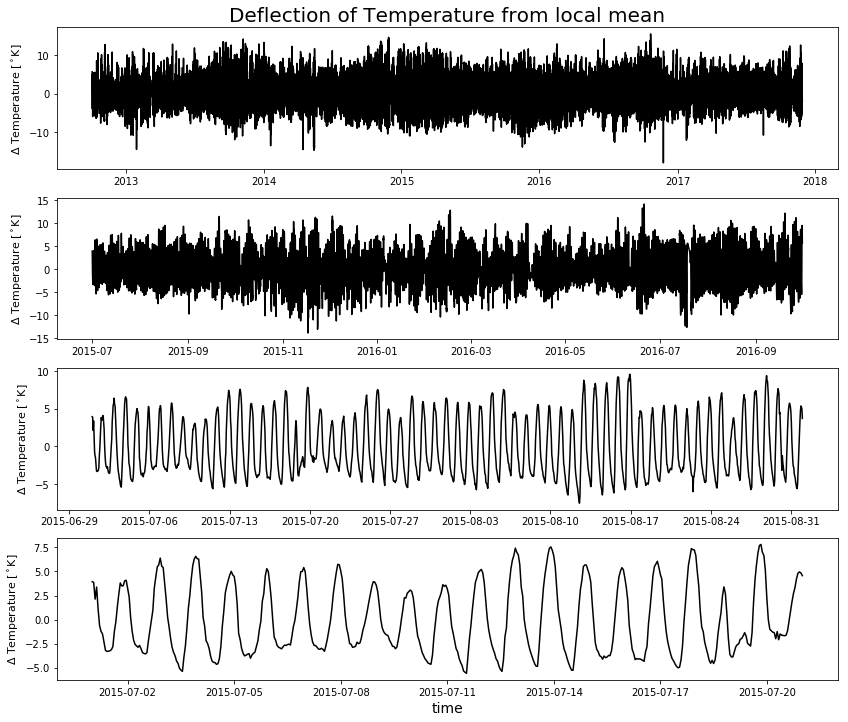

In [7]:
#%% subtract the low pass filtered singal from the original to get high pass filtered signal
highPassFilteredSignal = originalSignal - lowPassFilteredSignal

fig, ax = plt.subplots(nrows=4,ncols=1,figsize=(14,12))
ax[0].plot(t0,highPassFilteredSignal,c='k')
ax[1].plot(t1,highPassFilteredSignal[t1],c='k')
ax[2].plot(t2,highPassFilteredSignal[t2],c='k')
ax[3].plot(t3,highPassFilteredSignal[t3],c='k')

ax[0].set_title('Deflection of Temperature from local mean',fontsize=20)
for i in range(len(ax)): ax[i].set_ylabel('$\Delta$ Temperature [$^\circ$K]', fontsize=11)
ax[3].set_xlabel('time', fontsize=14);

We see that the resulting signal is now varying around zero and the bottom plot is much more periodic. We've essentially removed the slow changing signal that the fast changing signal was riding on top of, and extracted the fast changing signal only.

# Show the Auto-Correlation of the Low Pass Filtered Signal

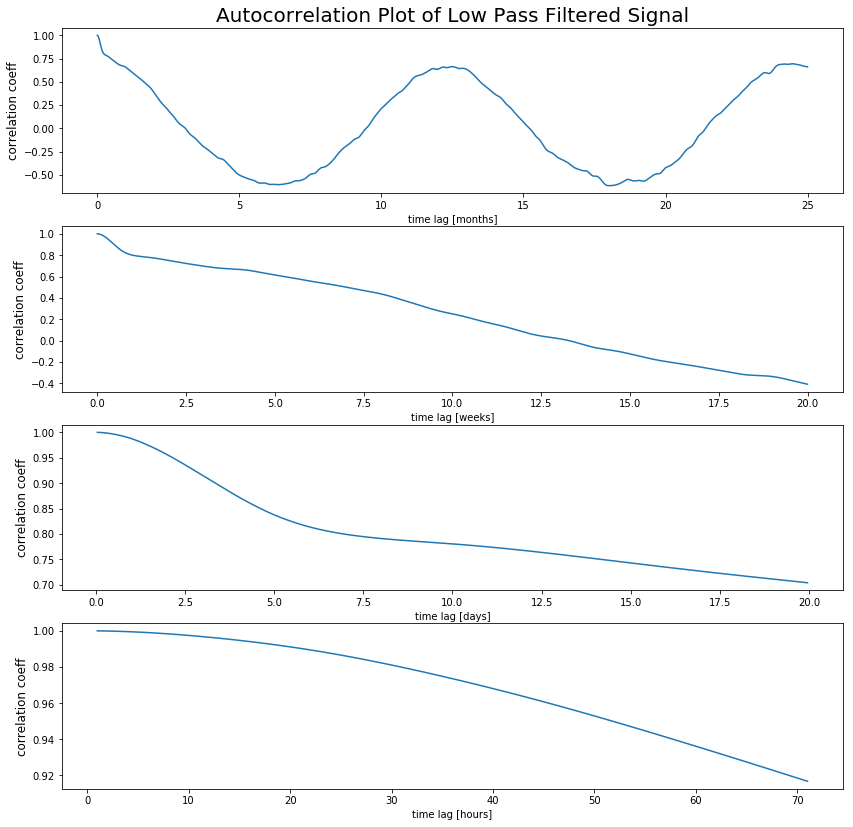

In [8]:
#%% autocorr of low pass filtered singal
fig, ax = plt.subplots(nrows=4,ncols=1,figsize=(14,14))

timeLags = np.arange(1,25*24*30)
autoCorr = [lowPassFilteredSignal.autocorr(lag=dt) for dt in timeLags]
ax[0].plot(1.0/(24*30)*timeLags, autoCorr); 
ax[0].set_title('Autocorrelation Plot of Low Pass Filtered Signal', fontsize=20);
ax[0].set_xlabel('time lag [months]'); ax[0].set_ylabel('correlation coeff', fontsize=12);

timeLags = np.arange(1,20*24*7)
autoCorr = [lowPassFilteredSignal.autocorr(lag=dt) for dt in timeLags]
ax[1].plot(1.0/(24*7)*timeLags, autoCorr);
ax[1].set_xlabel('time lag [weeks]'); ax[1].set_ylabel('correlation coeff', fontsize=12);

timeLags = np.arange(1,20*24)
autoCorr = [lowPassFilteredSignal.autocorr(lag=dt) for dt in timeLags]
ax[2].plot(1.0/24*timeLags, autoCorr);
ax[2].set_xlabel('time lag [days]'); ax[2].set_ylabel('correlation coeff', fontsize=12);

timeLags = np.arange(1,3*24)
autoCorr = [lowPassFilteredSignal.autocorr(lag=dt) for dt in timeLags]
ax[3].plot(timeLags, autoCorr);
ax[3].set_xlabel('time lag [hours]'); ax[3].set_ylabel('correlation coeff', fontsize=12);

We see that the low pass signal displays now only the yearly periodicity, because the yearly periodicity is related to slow changes in the signal and we've remove the high changing signals by applying the moving average operation

# Show the Auto-Correlation of the High Pass Filtered Signal

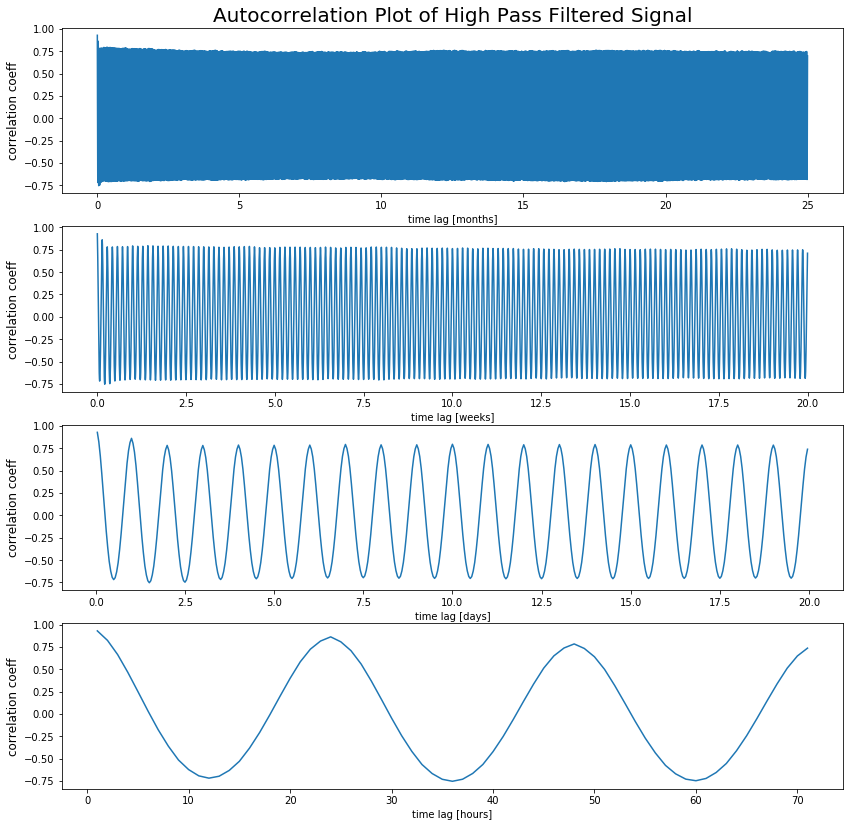

In [9]:
#%% autocorr of high pass filtered signal
fig, ax = plt.subplots(nrows=4,ncols=1, figsize=(14,14))

timeLags = np.arange(1,25*24*30)
autoCorr = [highPassFilteredSignal.autocorr(lag=dt) for dt in timeLags]
ax[0].plot(1.0/(24*30)*timeLags, autoCorr); 
ax[0].set_title('Autocorrelation Plot of High Pass Filtered Signal', fontsize=20);
ax[0].set_xlabel('time lag [months]'); ax[0].set_ylabel('correlation coeff', fontsize=12);

timeLags = np.arange(1,20*24*7)
autoCorr = [highPassFilteredSignal.autocorr(lag=dt) for dt in timeLags]
ax[1].plot(1.0/(24*7)*timeLags, autoCorr);
ax[1].set_xlabel('time lag [weeks]'); ax[1].set_ylabel('correlation coeff', fontsize=12);

timeLags = np.arange(1,20*24)
autoCorr = [highPassFilteredSignal.autocorr(lag=dt) for dt in timeLags]
ax[2].plot(1.0/24*timeLags, autoCorr);
ax[2].set_xlabel('time lag [days]'); ax[2].set_ylabel('correlation coeff', fontsize=12);

timeLags = np.arange(1,3*24)
autoCorr = [highPassFilteredSignal.autocorr(lag=dt) for dt in timeLags]
ax[3].plot(timeLags, autoCorr);
ax[3].set_xlabel('time lag [hours]'); ax[3].set_ylabel('correlation coeff', fontsize=12);

We see that the high pass signal displays now only the daily periodicity, because the daily periodicity is related to fast changes in the signal and we've remove the low changing signals by subtracting the moving average.